In [7]:
import pandas as pd 

In [2]:
train = pd.read_csv("clean_train_reviewsbg.csv")

In [3]:
#data set exploration to see if data got clean correctly 
train.shape

(25000, 4)

In [4]:
train.columns.values

array(['id', 'sentiment', 'review', 'cleanReview'], dtype=object)

In [5]:
train['cleanReview']

0        stuff going moment mj started listening music ...
1        classic war worlds timothy hines entertaining ...
2        film starts manager nicholas bell giving welco...
3        must assumed praised film greatest filmed oper...
4        superbly trashy wondrously unpretentious explo...
5        dont know people think bad movie got pretty go...
6        movie could good comes way short cheesy specia...
7        watched video friend house glad waste money bu...
8        friend mine bought film even grossly overprice...
9        movie full references like mad max ii wild one...
10       happens army wetbacks towelheads godless easte...
11       although generally like remakes believing rema...
12       mr harvey lights candle anchored brilliant per...
13       feeling submerged one better right must lookin...
14       note george litman others mystery science thea...
15       stephen king adaptation scripted king young fa...
16       matrix exciting summer blockbuster visually fa.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
id             25000 non-null object
sentiment      25000 non-null int64
review         25000 non-null object
cleanReview    25000 non-null object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB


In [8]:
train.loc[0]['cleanReview']

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [9]:
type(train['cleanReview'][0])

str

In [10]:
#get a word2vec model and load it
import gensim

In [11]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=500000)


C:\Users\ngmat\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [12]:
# try the model out and similar words for random words. Just to test the model
model.most_similar(positive=['sad'])

[('saddening', 0.7273085713386536),
 ('Sad', 0.6610826253890991),
 ('saddened', 0.6604382991790771),
 ('heartbreaking', 0.6573507785797119),
 ('disheartening', 0.6507317423820496),
 ('saddens_me', 0.6407118439674377),
 ('distressing', 0.6399092674255371),
 ('saddest', 0.6345508694648743),
 ('unfortunate', 0.6272086501121521),
 ('sorry', 0.6194046139717102)]

In [13]:
model.most_similar(positive=['good'])

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348937988281),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728254318237),
 ('solid', 0.5806034803390503),
 ('lousy', 0.5764201879501343)]

In [14]:
model.most_similar(positive=['bad'])

[('good', 0.7190051078796387),
 ('terrible', 0.6828612089157104),
 ('horrible', 0.6702598333358765),
 ('Bad', 0.6698919534683228),
 ('lousy', 0.6647640466690063),
 ('crummy', 0.5677819848060608),
 ('horrid', 0.5651682615280151),
 ('awful', 0.5527253150939941),
 ('dreadful', 0.5526429414749146),
 ('horrendous', 0.5445997714996338)]

In [15]:
model.most_similar(positive=['horrible'])

[('terrible', 0.92439204454422),
 ('horrendous', 0.8412426114082336),
 ('dreadful', 0.770708441734314),
 ('horrid', 0.7669703960418701),
 ('awful', 0.7597668170928955),
 ('atrocious', 0.7203570604324341),
 ('horrific', 0.7141486406326294),
 ('horrible_horrible', 0.7102487087249756),
 ('hideous', 0.697683572769165),
 ('appalling', 0.6743218898773193)]

In [16]:
model.most_similar(positive=['fantastic'])

[('terrific', 0.8317593932151794),
 ('wonderful', 0.8047919273376465),
 ('great', 0.7935211658477783),
 ('amazing', 0.7789870500564575),
 ('marvelous', 0.7687596082687378),
 ('fabulous', 0.760596513748169),
 ('awesome', 0.7453290224075317),
 ('phenomenal', 0.7392951846122742),
 ('incredible', 0.730705976486206),
 ('unbelievable', 0.7045333385467529)]

In [17]:
import matplotlib.pyplot as plt
import numpy as np

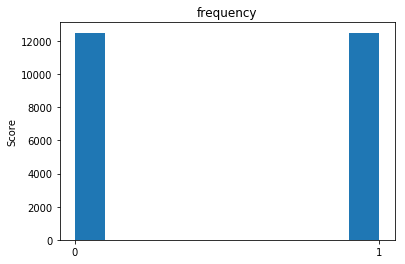

In [18]:
#see the distrbution of reviews
objects = ('0', '1')
y_pos = np.arange(len(objects))

plt.hist(train['sentiment'])
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('frequency')

plt.show()

In [32]:
# see the distrbution of reviews based on certain words and their similar words
c = model.most_similar(positive=['fantastic'])

In [33]:
j = [i[0] for i in c]

In [34]:
j.append('fantastic')
print(j)

['terrific', 'wonderful', 'great', 'amazing', 'marvelous', 'fabulous', 'awesome', 'phenomenal', 'incredible', 'unbelievable', 'fantastic']


In [25]:
b = []
for x in range(0, len(train)):
    for k in j:
        if (train.loc[x]['cleanReview'].find(k) != -1):
            b.append(train.loc[x])
            break

In [26]:
len(b)

9968

In [27]:
dfObj = pd.DataFrame(b) 
print(dfObj)

               id  sentiment  \
1        "2381_9"          1   
3        "3630_4"          0   
16       "4489_1"          0   
18      "3304_10"          1   
19      "9352_10"          1   
20       "3374_7"          1   
25       "6581_7"          1   
32       "1297_8"          1   
33       "5586_8"          1   
35      "11241_1"          0   
40       "7897_8"          1   
42     "12106_10"          1   
45       "4221_8"          1   
51       "2395_7"          1   
52       "4439_4"          0   
53       "8516_2"          0   
56       "301_10"          1   
57      "4155_10"          1   
58       "8880_3"          0   
59       "9569_9"          1   
60       "1510_8"          1   
66      "1150_10"          1   
70      "11471_7"          1   
72       "1142_3"          0   
73       "6403_3"          0   
74       "5440_2"          0   
78       "9952_8"          1   
79      "8605_10"          1   
81      "11736_9"          1   
84      "7168_10"          1   
...     

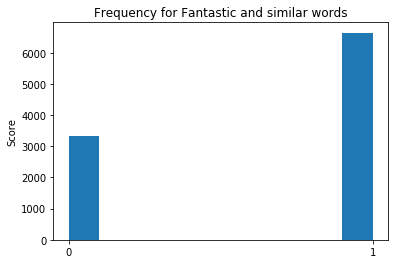

In [30]:
objects = ('0', '1')
y_pos = np.arange(len(objects))

plt.hist(dfObj['sentiment'])
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Frequency for Fantastic and similar words')

plt.show()

In [35]:
c = model.most_similar(positive=['horrible'])

In [36]:
j = [i[0] for i in c]

In [37]:
j.append('horrible')
print(j)

['terrible', 'horrendous', 'dreadful', 'horrid', 'awful', 'atrocious', 'horrific', 'horrible_horrible', 'hideous', 'appalling', 'horrible']


In [38]:
b = []
for x in range(0, len(train)):
    for k in j:
        if (train.loc[x]['cleanReview'].find(k) != -1):
            b.append(train.loc[x])
            break

In [39]:
len(b)

4168

In [40]:
dfObj = pd.DataFrame(b) 
print(dfObj)

               id  sentiment  \
4        "9495_8"          1   
17       "3951_2"          0   
21      "10782_7"          1   
33       "5586_8"          1   
34       "1119_1"          0   
35      "11241_1"          0   
43      "11427_1"          0   
48       "7316_1"          0   
76       "8459_3"          0   
85       "9060_1"          0   
88     "10533_10"          1   
101      "8157_4"          0   
108      "9170_1"          0   
110      "2493_1"          0   
111      "1587_2"          0   
120      "2229_7"          1   
122       "116_1"          0   
124     "10069_1"          0   
125      "2982_1"          0   
126      "2119_4"          0   
131      "8132_3"          0   
142      "3160_1"          0   
144      "4886_1"          0   
146      "9934_3"          0   
149     "11973_4"          0   
153      "8125_7"          1   
155      "5752_1"          0   
159      "5427_3"          0   
162      "2326_8"          1   
169      "8273_2"          0   
...     

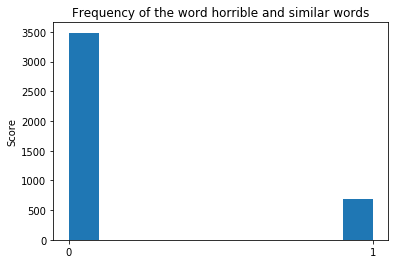

In [41]:
objects = ('0', '1')
y_pos = np.arange(len(objects))

plt.hist(dfObj['sentiment'])
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Frequency of the word horrible and similar words')

plt.show()

In [42]:
c = model.most_similar(positive=['bad'])

In [43]:
j = [i[0] for i in c]

In [44]:
j.append('bad')
print(j)

['good', 'terrible', 'horrible', 'Bad', 'lousy', 'crummy', 'horrid', 'awful', 'dreadful', 'horrendous', 'bad']


In [45]:
b = []
for x in range(0, len(train)):
    for k in j:
        if (train.loc[x]['cleanReview'].find(k) != -1):
            b.append(train.loc[x])
            break

In [46]:
len(b)

14333

In [47]:
dfObj = pd.DataFrame(b) 
print(dfObj)

              id  sentiment  \
0       "5814_8"          1   
2       "7759_3"          0   
3       "3630_4"          0   
5       "8196_8"          1   
6       "7166_2"          0   
7      "10633_1"          0   
11     "6811_10"          1   
12     "11744_9"          1   
13      "7369_1"          0   
14     "12081_1"          0   
16      "4489_1"          0   
17      "3951_2"          0   
21     "10782_7"          1   
28      "9152_1"          0   
31      "9727_7"          1   
32      "1297_8"          1   
33      "5586_8"          1   
34      "1119_1"          0   
35     "11241_1"          0   
38      "9011_9"          1   
39     "11885_1"          0   
40      "7897_8"          1   
41      "4613_4"          0   
43     "11427_1"          0   
47      "9788_9"          1   
48      "7316_1"          0   
52      "4439_4"          0   
59      "9569_9"          1   
60      "1510_8"          1   
66     "1150_10"          1   
...          ...        ...   
24943   

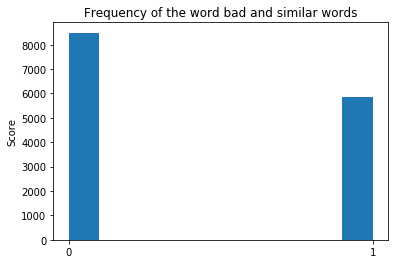

In [50]:
objects = ('0', '1')
y_pos = np.arange(len(objects))

plt.hist(dfObj['sentiment'])
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Frequency of the word bad and similar words')

plt.show()

In [54]:
c = model.most_similar(positive=['good'])

In [55]:
j = [i[0] for i in c]
j.append('good')

In [56]:
print(j)

['great', 'bad', 'terrific', 'decent', 'nice', 'excellent', 'fantastic', 'better', 'solid', 'lousy', 'good']


In [57]:
b = []
for x in range(0, len(train)):
    for k in j:
        if (train.loc[x]['cleanReview'].find(k) != -1):
            b.append(train.loc[x])
            break

In [59]:
len(b)

18757

In [60]:
dfObj = pd.DataFrame(b) 
print(dfObj)

               id  sentiment  \
0        "5814_8"          1   
1        "2381_9"          1   
2        "7759_3"          0   
3        "3630_4"          0   
5        "8196_8"          1   
6        "7166_2"          0   
7       "10633_1"          0   
10       "2486_3"          0   
11      "6811_10"          1   
12      "11744_9"          1   
13       "7369_1"          0   
14      "12081_1"          0   
15       "3561_4"          0   
16       "4489_1"          0   
17       "3951_2"          0   
18      "3304_10"          1   
19      "9352_10"          1   
20       "3374_7"          1   
21      "10782_7"          1   
26       "2203_3"          0   
28       "9152_1"          0   
31       "9727_7"          1   
32       "1297_8"          1   
33       "5586_8"          1   
34       "1119_1"          0   
35      "11241_1"          0   
36      "4005_10"          1   
38       "9011_9"          1   
39      "11885_1"          0   
40       "7897_8"          1   
...     

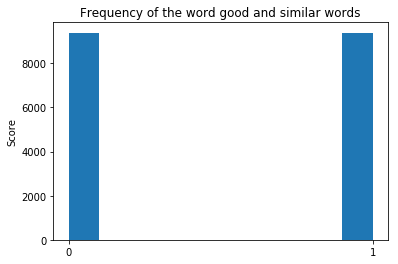

In [62]:
objects = ('0', '1')
y_pos = np.arange(len(objects))

plt.hist(dfObj['sentiment'])
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Frequency of the word good and similar words')

plt.show()

In [63]:
c = model.most_similar(positive=['worst'])

In [64]:
j = [i[0] for i in c]
j.append('worst')

In [65]:
print(j)

['Worst', 'weakest', 'scariest', 'ugliest', 'best', 'bleakest', 'strongest', 'nastiest', 'lousiest', 'toughest', 'worst']


In [66]:
b = []
for x in range(0, len(train)):
    for k in j:
        if (train.loc[x]['cleanReview'].find(k) != -1):
            b.append(train.loc[x])
            break

In [67]:
len(b)

6960

In [77]:
dfObj = pd.DataFrame(b) 
print(dfObj)

               id  sentiment  \
0        "5814_8"          1   
2        "7759_3"          0   
3        "3630_4"          0   
5        "8196_8"          1   
6        "7166_2"          0   
8         "319_1"          0   
11      "6811_10"          1   
12      "11744_9"          1   
14      "12081_1"          0   
15       "3561_4"          0   
16       "4489_1"          0   
17       "3951_2"          0   
20       "3374_7"          1   
21      "10782_7"          1   
26       "2203_3"          0   
28       "9152_1"          0   
29       "6077_1"          0   
32       "1297_8"          1   
34       "1119_1"          0   
35      "11241_1"          0   
38       "9011_9"          1   
39      "11885_1"          0   
41       "4613_4"          0   
42     "12106_10"          1   
45       "4221_8"          1   
47       "9788_9"          1   
52       "4439_4"          0   
53       "8516_2"          0   
57      "4155_10"          1   
59       "9569_9"          1   
...     

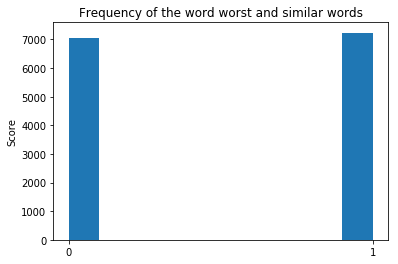

In [78]:
objects = ('0', '1')
y_pos = np.arange(len(objects))

plt.hist(dfObj['sentiment'])
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Frequency of the word worst and similar words')

plt.show()

In [79]:
c = model.most_similar(positive=['best'])

In [80]:
j = [i[0] for i in c]
j.append('best')

In [81]:
print(j)

['finest', 'worst', 'greatest', 'strongest', 'smartest', 'easiest', 'good', 'quickest', 'healthiest', 'terrific', 'best']


In [82]:
b = []
for x in range(0, len(train)):
    for k in j:
        if (train.loc[x]['cleanReview'].find(k) != -1):
            b.append(train.loc[x])
            break

In [83]:
len(b)

14287

In [84]:
dfObj = pd.DataFrame(b) 
print(dfObj)

               id  sentiment  \
0        "5814_8"          1   
2        "7759_3"          0   
3        "3630_4"          0   
5        "8196_8"          1   
6        "7166_2"          0   
8         "319_1"          0   
11      "6811_10"          1   
12      "11744_9"          1   
14      "12081_1"          0   
15       "3561_4"          0   
16       "4489_1"          0   
17       "3951_2"          0   
20       "3374_7"          1   
21      "10782_7"          1   
26       "2203_3"          0   
28       "9152_1"          0   
29       "6077_1"          0   
32       "1297_8"          1   
34       "1119_1"          0   
35      "11241_1"          0   
38       "9011_9"          1   
39      "11885_1"          0   
41       "4613_4"          0   
42     "12106_10"          1   
45       "4221_8"          1   
47       "9788_9"          1   
52       "4439_4"          0   
53       "8516_2"          0   
57      "4155_10"          1   
59       "9569_9"          1   
...     

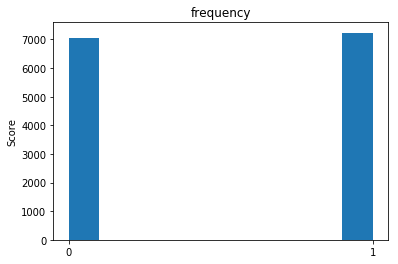

In [85]:
objects = ('0', '1')
y_pos = np.arange(len(objects))

plt.hist(dfObj['sentiment'])
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Frequency of the word best and similar words')

plt.show()